###   Data Preparation

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pandas import DataFrame, Series

### Load the test file

In [69]:
testdata=pd.read_csv('train.csv')

In [70]:
# Info

testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [71]:
# Describe

testdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
# Review first five rows

testdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


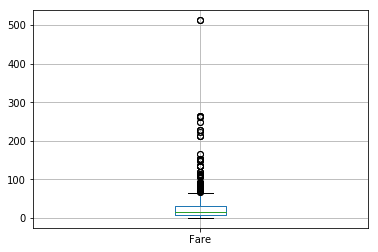

In [73]:
# Boxplot for Fare
testdata.boxplot(column='Fare')


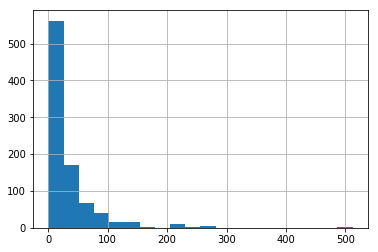

In [74]:
# Histogram for Fare
testdata['Fare'].hist(bins=20)

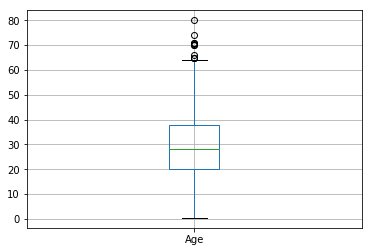

In [75]:
# Boxplot for Age
testdata.boxplot(column='Age')

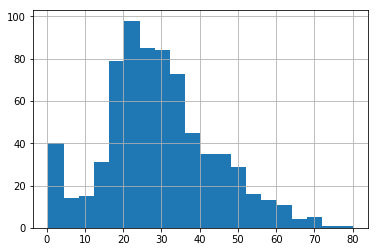

In [76]:
# Histogram for Age
testdata['Age'].hist(bins=20)


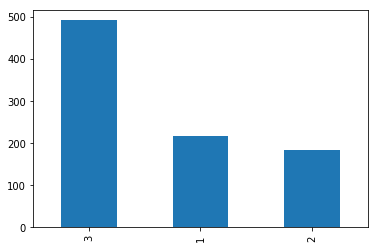

In [77]:
# Histogram for Class
testdata["Pclass"].value_counts().plot(kind='bar')


In [78]:
# Calc the correlation between Pclass and Fare
# Not surpisingly, they're negatively correlated
testdata['Fare'].corr(testdata['Pclass'])


-0.5494996199439078

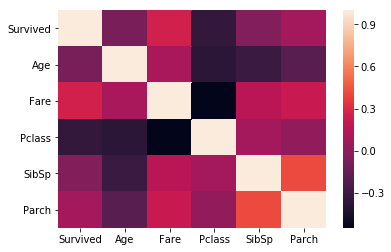

In [102]:
corr = testdata[['Survived', 'Age','Fare', 'Pclass', 'SibSp', 'Parch']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [87]:
# Calc the correlation between Survived and Pclass
testdata['Survived'].corr(testdata['Pclass'])


-0.33848103596101475

In [88]:
# Calc the correlation between Survived and Age
testdata['Survived'].corr(testdata['Age'])


-0.07722109457217764

In [89]:
# Calc the correlation between Survived and Fare
testdata['Survived'].corr(testdata['Fare'])

0.25730652238496227

In [79]:
# How many passengers were loaded at each embarkation point?
testdata.groupby(['Embarked'])['Fare'].count()

Embarked
C    168
Q     77
S    644
Name: Fare, dtype: int64

In [82]:
# Are there any patterns based on embarkation?
# C embarkation is clearly higher in fare and lower in class, and more likely to survive
testdata.groupby(['Embarked'])['Age','SibSp','Parch','Pclass','Fare', 'Survived'].mean()

,Age,SibSp,Parch,Pclass,Fare,Survived
Embarked,,,,,,
C,30.814769,0.386905,0.363095,1.886905,59.954144,0.553571
Q,28.089286,0.428571,0.168831,2.909091,13.276030,0.389610
S,29.445397,0.571429,0.413043,2.350932,27.079812,0.336957


In [83]:
# Are there any patterns based on Pclass?
testdata.groupby(['Pclass'])['Age','SibSp','Parch','Fare', 'Survived'].mean()

,Age,SibSp,Parch,Fare,Survived
Pclass,,,,,
1,38.233441,0.416667,0.356481,84.154687,0.629630
2,29.877630,0.402174,0.380435,20.662183,0.472826
3,25.140620,0.615071,0.393075,13.675550,0.242363


In [91]:
# Are there any patterns based on Gender?
testdata.groupby(['Sex'])['Age','SibSp','Parch','Fare','Pclass','Survived'].mean()

,Age,SibSp,Parch,Fare,Pclass,Survived
Sex,,,,,,
female,27.915709,0.694268,0.649682,44.479818,2.159236,0.742038
male,30.726645,0.429809,0.235702,25.523893,2.389948,0.188908
